In [4]:
#importing libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()


In [5]:
#tells there are n images and m features(n,m)
print("Image Data Shape", digits.data.shape)
#tells there are n lables(n,)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


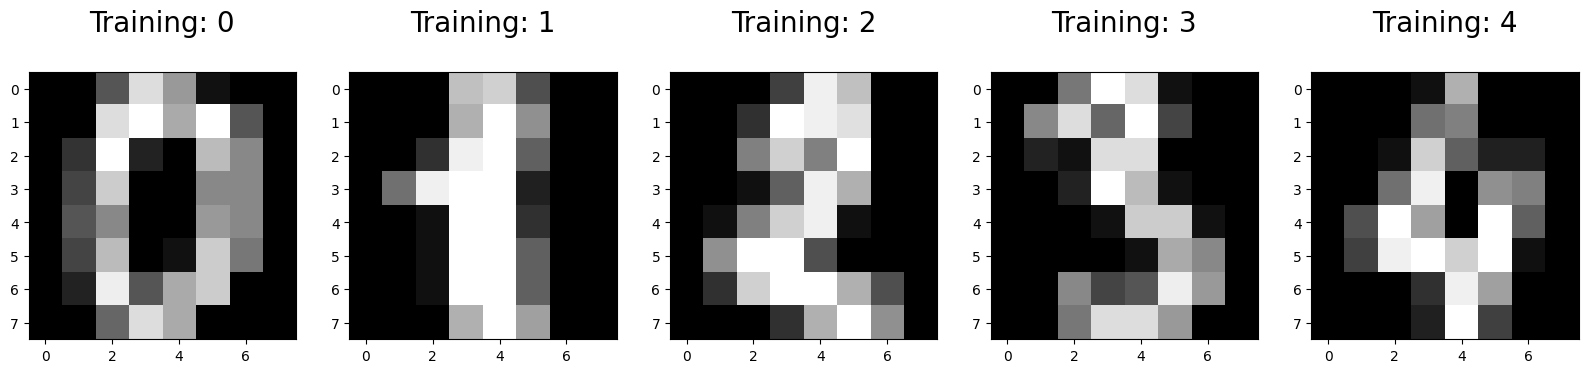

In [6]:
#displaying some images and labels
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
 plt.subplot(1,5,index+1)
 plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize=20)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [8]:
print(x_train.shape)

(1383, 64)


In [9]:
y_train.shape

(1383,)

In [10]:
x_test.shape

(414, 64)

In [11]:
y_test.shape

(414,)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#fitting training set into the model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\khush\ml\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
log_reg.set_params(class_weight=0.0)

LogisticRegression(class_weight=0.0)

In [22]:
log_reg.get_params(deep=True)

{'C': 1.0,
 'class_weight': 0.0,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
#prediction
print(log_reg.predict(x_test[0].reshape(1,-1)))

[4]


In [32]:
predictions=log_reg.predict(x_test)

In [39]:
#accuracy
score=log_reg.score(x_test,y_test)
print(log_reg.score(x_test,y_test))

0.9516908212560387


In [40]:
#using confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [41]:
con_mat=metrics.confusion_matrix(y_test,predictions)

In [42]:
print(con_mat)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


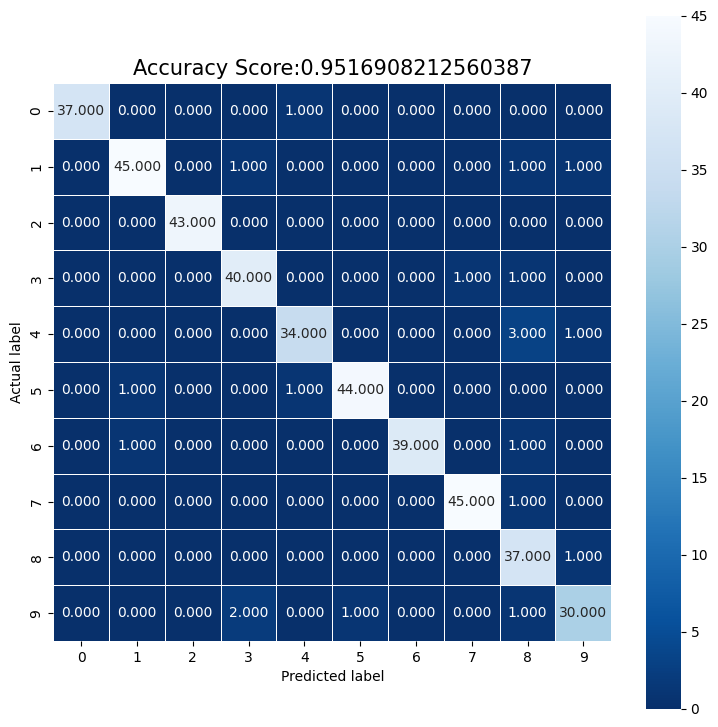

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(con_mat,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15);


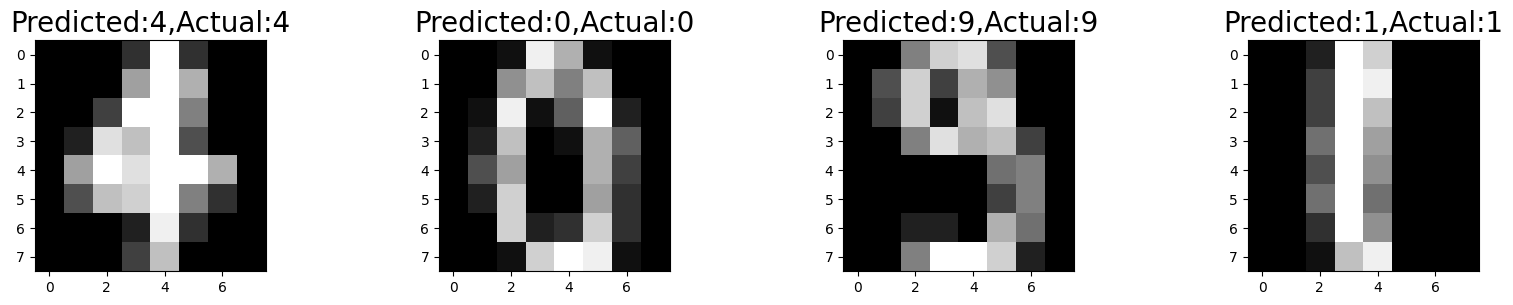

In [53]:
#example data on how well the system classifies
index=0
class_index=[]
for predict,actual in zip(predictions,y_test):
    if predict==actual:
       class_index.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotindex,wrong in enumerate(class_index[0:4]):
    plt.subplot(1,4,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)